# CNN Project

# Problem Statement: Build a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images of 10 classes, such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

**Indented block**

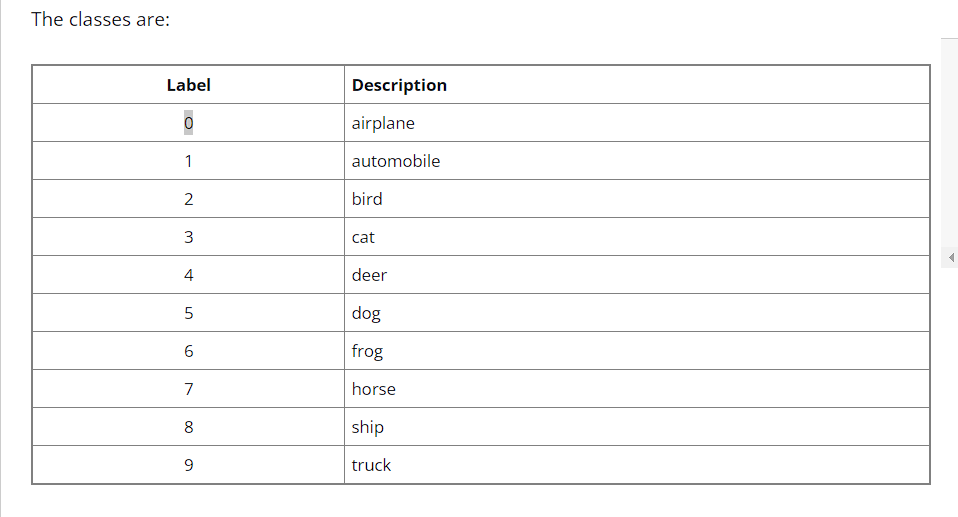

In [ ]:
from keras.datasets import cifar10

In [ ]:
(xtrain, ytrain) , (xtest, ytest) = cifar10.load_data()

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
xtest.shape

(10000, 32, 32, 3)

# Viewing top 9 labels

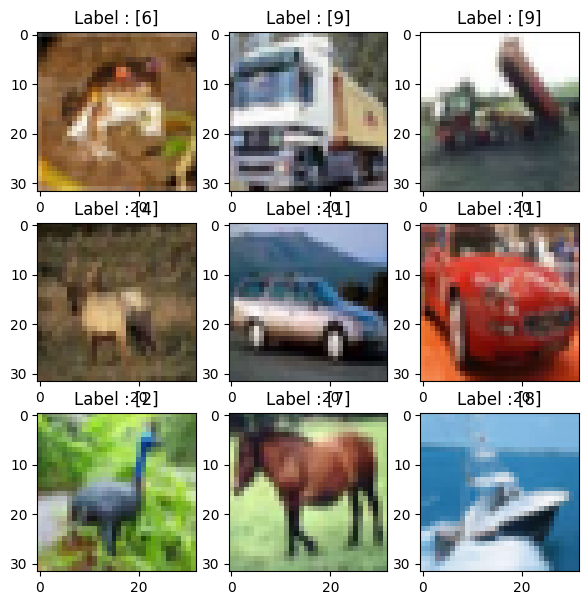

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))

for i in range(9):

  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i])
  plt.title(f'Label : {ytrain[i]}')

plt.show()

# Preprocessing the data

In [ ]:
xtrain[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [ ]:
xtrain_scl = xtrain/255
xtest_scl  = xtest/255

In [ ]:
# Convert ytrain and ytest to categorical

from keras.utils import to_categorical

ytrain_cat = to_categorical(ytrain)
ytest_cat  = to_categorical(ytest)

In [ ]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
ytrain_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Create your neural network

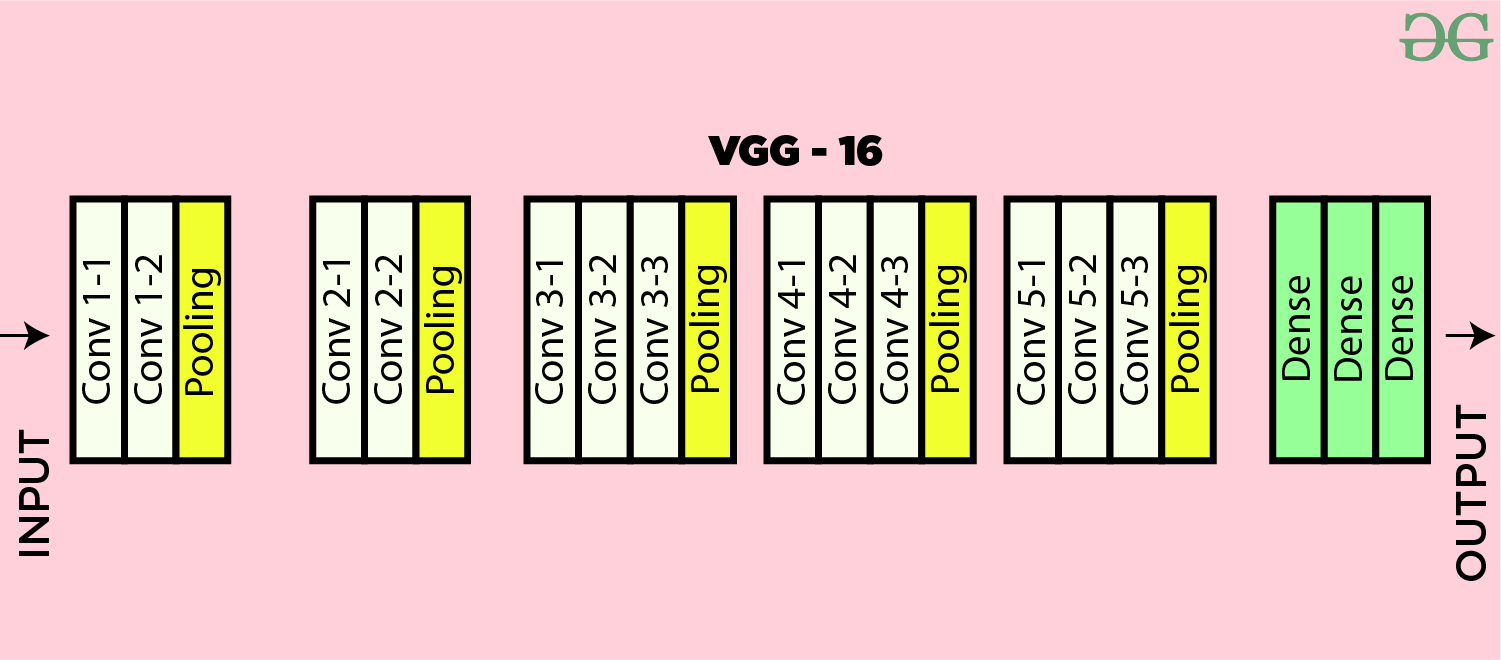

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
model = Sequential()

# Layer1 Convolution Layer

model.add(Conv2D(filters=32, kernel_size=(3,3),padding='same',input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))


# Layer2 Convolution

model.add(Conv2D(filters=64, kernel_size=(3,3), padding= 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


# Layer3 Flatten

model.add(Flatten())


# Dense Layers

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))


# OutPut Layer

model.add(Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
Hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.2, epochs=30)

Epoch 1/30
1250/1250 [==============================] - 16s 9ms/step - loss: 1.5441 - accuracy: 0.4661 - val_loss: 1.1617 - val_accuracy: 0.5928
Epoch 2/30
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0842 - accuracy: 0.6187 - val_loss: 0.9246 - val_accuracy: 0.6765
Epoch 3/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9391 - accuracy: 0.6729 - val_loss: 1.1004 - val_accuracy: 0.6260
Epoch 4/30
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8640 - accuracy: 0.6981 - val_loss: 0.9052 - val_accuracy: 0.6942
Epoch 5/30
1250/1250 [==============================] - 11s 8ms/step - loss: 0.8129 - accuracy: 0.7171 - val_loss: 0.8384 - val_accuracy: 0.7093
Epoch 6/30
1250/1250 [==============================] - 11s 8ms/step - loss: 0.7642 - accuracy: 0.7322 - val_loss: 0.7945 - val_accuracy: 0.7178
Epoch 7/30
1250/1250 [==============================] - 10s 8ms/step - loss: 0.7275 - accuracy: 0.7483 - val_loss: 0.8069 - val_ac

# Plot the learning curve

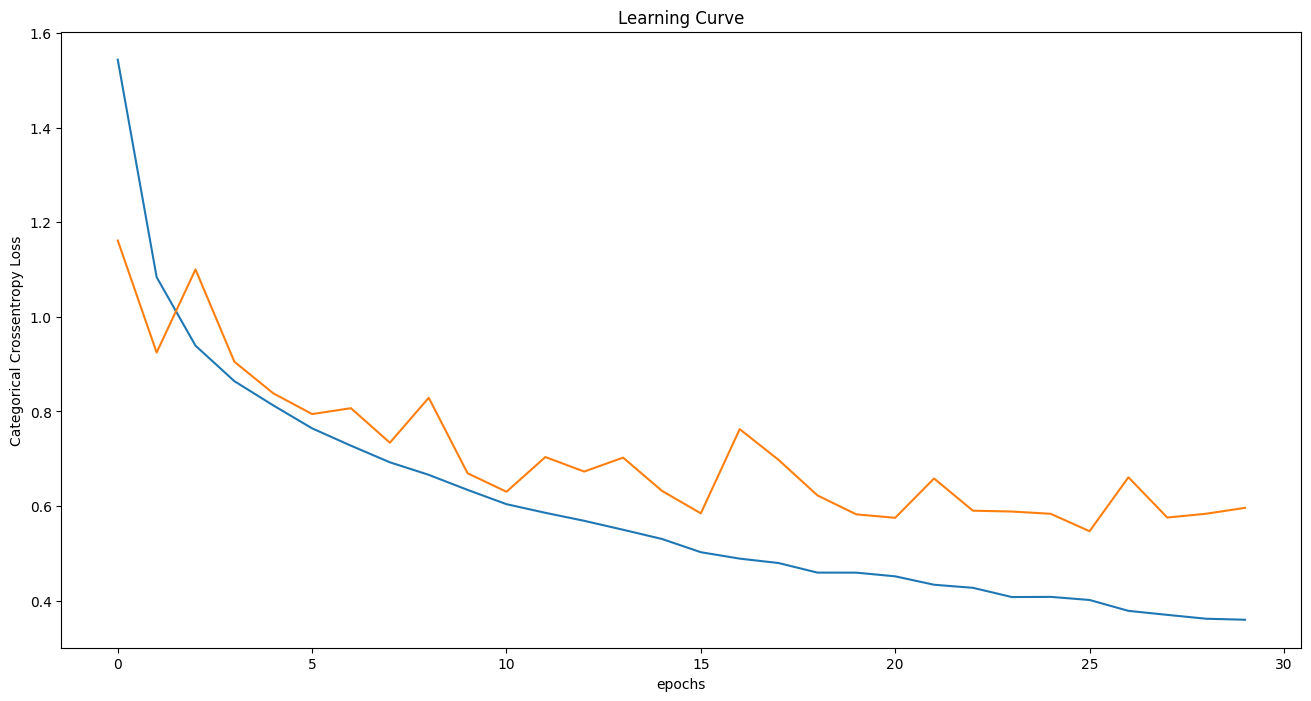

In [ ]:
plt.figure(figsize=(16,8))

plt.plot(Hist.history['loss'], label='Train Loss')
plt.plot(Hist.history['val_loss'], label='Validation Loss')

plt.xlabel("epochs")
plt.ylabel("Categorical Crossentropy Loss")
plt.title("Learning Curve")

plt.show()

# Evaluate The Model

In [ ]:
model.evaluate(xtrain_scl, ytrain_cat)

1563/1563 [==============================] - 6s 4ms/step - loss: 0.2536 - accuracy: 0.9257


[0.2535613775253296, 0.9256799817085266]

In [ ]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 1s 5ms/step - loss: 0.6171 - accuracy: 0.8010


[0.6170525550842285, 0.8009999990463257]

# Predicting The Labels

In [ ]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts =model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [ ]:
yprob_tr[0]

array([1.16238269e-07, 1.30697003e-06, 2.35908641e-03, 5.57911620e-02,
       6.17777114e-05, 2.45764315e-01, 6.95918262e-01, 1.03266961e-04,
       5.65142727e-07, 1.04352935e-07], dtype=float32)

In [ ]:
import numpy as np

ypred_tr = np.argmax(yprob_tr, axis=-1)
ypred_ts = np.argmax(yprob_ts, axis=-1)



In [ ]:
ypred_tr[0:5]

array([6, 9, 9, 4, 1])

In [ ]:
ypred_ts[0:5]

array([3, 8, 1, 0, 6])

In [ ]:
ytest[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Confusion Matrix

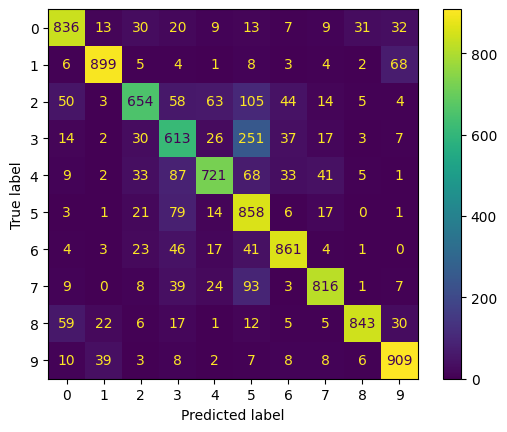

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf)

cfd.plot()

# Print Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.91      0.90      0.91      1000
           2       0.80      0.65      0.72      1000
           3       0.63      0.61      0.62      1000
           4       0.82      0.72      0.77      1000
           5       0.59      0.86      0.70      1000
           6       0.86      0.86      0.86      1000
           7       0.87      0.82      0.84      1000
           8       0.94      0.84      0.89      1000
           9       0.86      0.91      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

